# Asset Allocation and Statistical Data Analysis

**Introduction:** Analyzing a portfolio - a collection of financial investments, a group of assets such as stocks , bond, mututal funds and ETFs (Exchange Traded Funds)

Assumption: $1M dollars to invest in the market, how can we allocate these assets among a selected set of securities...

To invest in Apple? S&P 500? Bonds?

This will consider factors such as client risk tolerance, target returns and investment time span.

In this workbook I will create a function to perform portfolio analysis such as calculating
 - **Portfolio returns**
 - **Risk**
 - **Sharpe ratio**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.  ASSET TYPES

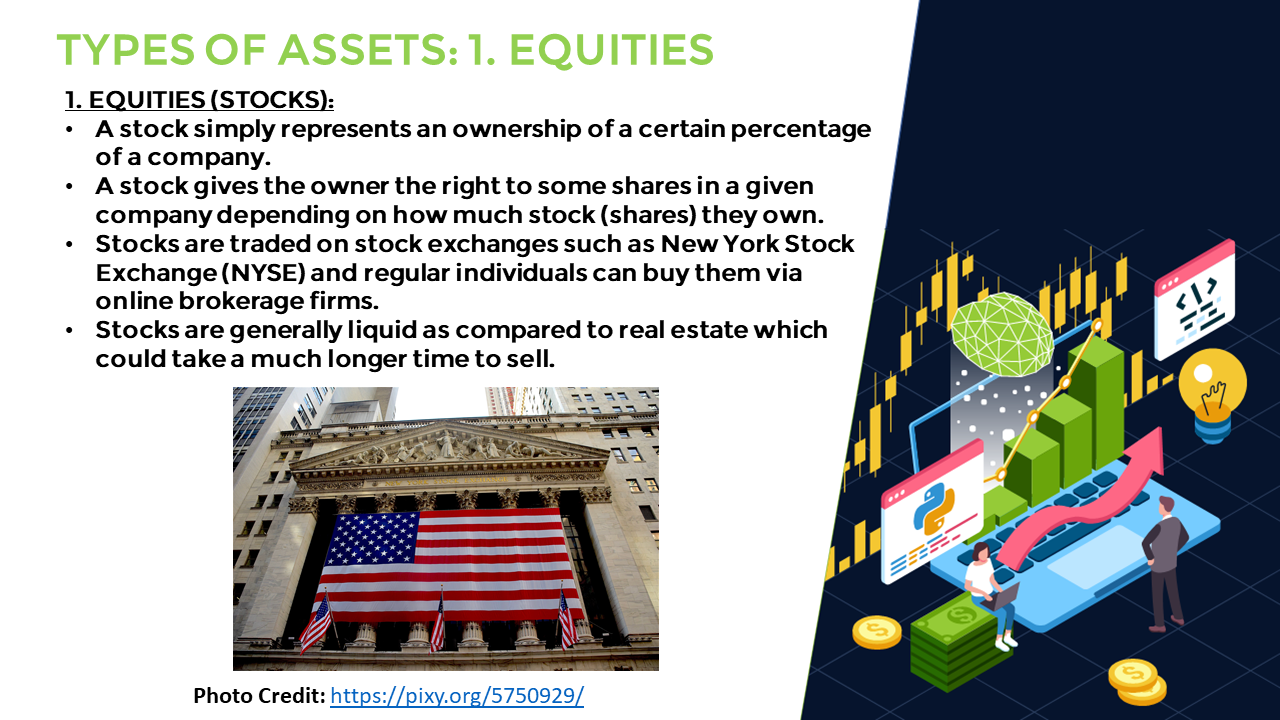

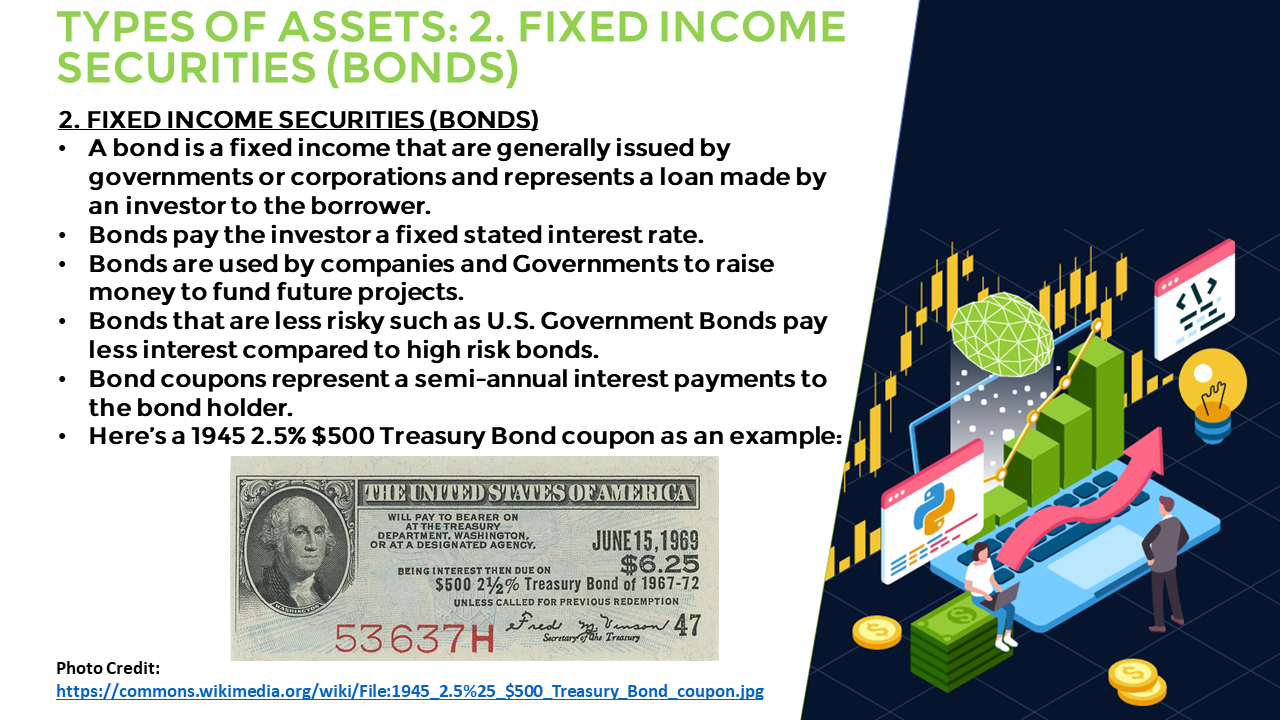

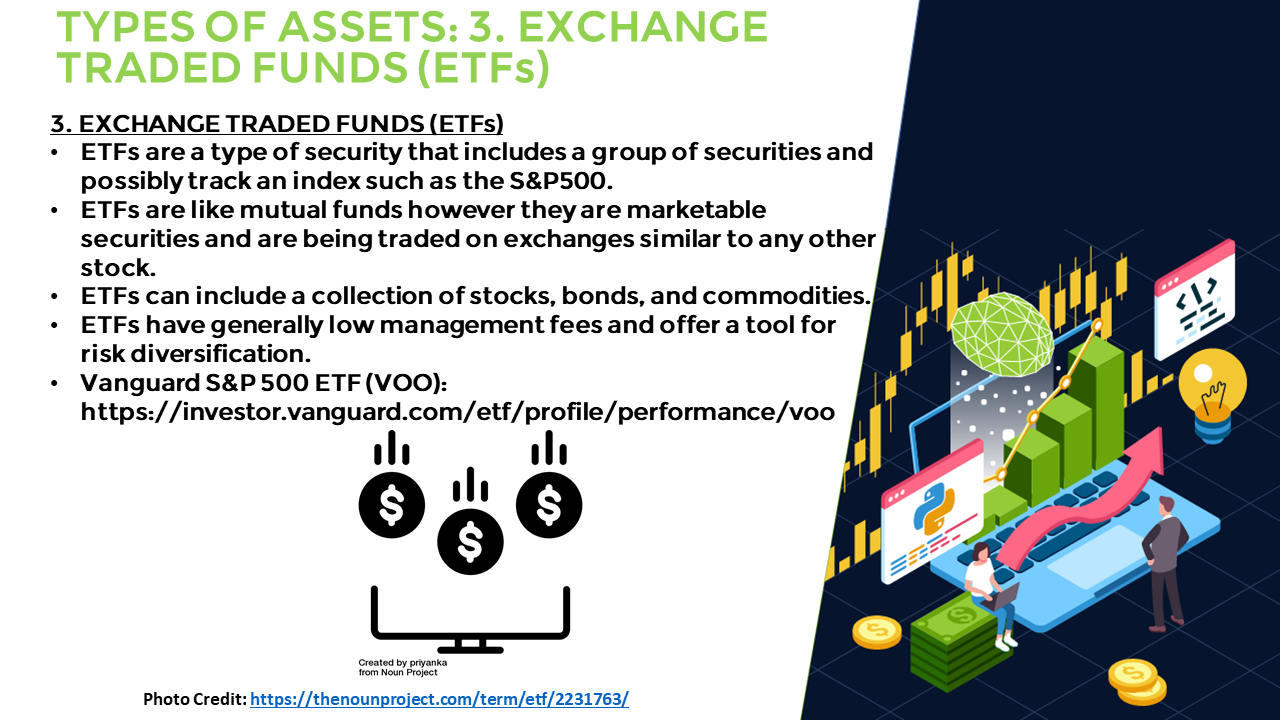

# 2. Performing data visualization

In [3]:
# Importing libraries and datasets to perform data visualization
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go


In [4]:
# Read the stock data file
stocks_df = pd.read_csv('/content/drive/MyDrive/Stock Predictions/stock.csv')


In [5]:
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [6]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [7]:
# Using Plotly express to visualize raw stock data and normalized ones
# Start by creating a function and then plot


def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i]=x[i]/x[i][0]
  return x


In [8]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()


In [9]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [10]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

# 3. Understanding ASSET ALLOCATION

Asset allocation is an investment strategy that is used to allocate client's assets based on their risk tolerence, target returns and investment time span. The goal remains to maximize returns and reduce risks.


Asset classes listed below:

- Equities/stocks
- Fixed nome securieites/bonds
- Cash and equivalents
- Exchange Traded Funds
- Real estate
- Commodities

*What is the common advice that financial advisors generally give to retired seniors when it comes to asset allocations?*

- *The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks*
- *For Example: If you're 30 years old, you should have 70% allocated to stocks*
- *If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio).*

#4. Performing random asset allocation and calculating portfolio daily return





In [11]:
# Let us start with random weights for all 9 securities from the dataset

# Let's create random portfolio weights
# Portfolio weights must sum to 1

# Set random seed
np.random.seed(101)

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))



In [12]:
weights

array([0.51639863, 0.57066759, 0.02847423, 0.17152166, 0.68527698,
       0.83389686, 0.30696622, 0.89361308, 0.72154386])

In [13]:
# Ensure the sum of all weights is 1
weights = weights/np.sum(weights)
print(weights)


[0.10921307 0.12069041 0.00602201 0.03627509 0.14492913 0.17636073
 0.06492024 0.1889901  0.15259921]


In [14]:
# Normalize the stock values
df_portfolio = normalize(stocks_df)
df_portfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [15]:
df_portfolio.columns[1:] #without Date column

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [16]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597  
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487  
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881  
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712  
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810  
...            ...            ...           ...            ...            ...  
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760  
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529  
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817  
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149  
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603  

[2159 rows x 10 columns]

In [19]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis =1)
df_portfolio

<ipython-input-19-cb150e488650>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  
0                   1.000000e+06  
1                   9.847792e+05  
2                   1.000669e+06  
3                   1.013905e+06  
4                   1.020814e+06  
...                          ...  
2154                8.588634e+06  
2155                8.664444e+06  
2156                8.506059e+06  
2157                8.450456e+06  
2158                8.256690e+06  

[2159 rows x 11 columns]

In [27]:
# Let us calculate portfolio daily return
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  #Calculate the percentage of chang from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100
df_portfolio


Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.847792e+05                 -1.522076  
2                   1.000669e+06                  1.613507  
3                   1.013905e+06                  1.322705  
4                   1.020814e+06                  0.681427  
...                          ...                       ...  
2154                8.588634e+06                  0.879605  
2155                8.664444e+06                  0.882669  
2156                8.506059e+06                 -1.827981  
2157                8.450456e+06                 -0.653686  
2158                8.256690e+06                 -2.292973  

[2159 rows x 12 columns]

This can be experiemented with different random weights allocation and reruning the code.
current return is 8.2M (8.256690e+06), but this can be 10M, 11M, 5M and so on with different weightage given to entities.


# 5. Portfolio Allocation - Daily Return/ Worth Calculation (function)

Let's assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks.
We will create a function that takes in the stock prices along with the weights and retun:

- (1) Daily value of each individual securuty in $ over the specified time period
- (2) Overall daily worth of the entire portfolio
- (3) Daily return

In [26]:
def portfolio_allocation(df, weights):

  df_portfolio = df.copy()

  # Normalize the stock avalues
  df_portfolio = normalize(df_portfolio)

  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)

  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):

    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [28]:
df_portfolio = portfolio_allocation(stocks_df, weights)
df_portfolio

<ipython-input-26-31f368c14b7e>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.847792e+05                 -1.522076  
2                   1.000669e+06                  1.613507  
3                   1.013905e+06                  1.322705  
4                   1.020814e+06                  0.681427  
...                          ...                       ...  
2154                8.588634e+06                  0.879605  
2155                8.664444e+06                  0.882669  
2156                8.506059e+06                 -1.827981  
2157                8.450456e+06                 -0.653686  
2158                8.256690e+06                 -2.292973  

[2159 rows x 12 columns]

# 5. Performing Portfolio Data Visualization


In [31]:
# Plot the portfolio daily return using plotly express
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = "Portfolio Daily % Return")
fig.show()

 A steep drop around 2020 (covid) is visible

In [32]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

*By now I find Tesla's share quite interesting! But Amazon looks stable and solid.*

In [33]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

- Plotting the portfolio overall daily worth vs. time.
- Return the code with various weights and visualize the final value.

In [34]:
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title = "Portfolio Overall Value in $")
fig.show()

In [42]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1

# Set random seed
np.random.seed()

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))

# Ensure the sum of all weights is 1
weights = weights/np.sum(weights)
print(weights)


[0.18654547 0.13205567 0.03872607 0.06626519 0.06823688 0.13340007
 0.10205676 0.15602475 0.11668915]


**Re run the entire code with new weights**

In [43]:
# Normalize the stock values
df_portfolio = normalize(stocks_df)
df_portfolio

df_portfolio.columns[1:] #without Date column

# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis =1)
df_portfolio

# Let's calculate the portfolio daily return
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

df_portfolio



<ipython-input-43-d7555c221b9a>:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date          AAPL             BA             T            MGM  \
0     2012-01-12  1.865455e+05  132055.668533  38726.066735   66265.191333   
1     2012-01-13  1.858460e+05  130464.208019  38661.779153   67467.033221   
2     2012-01-17  1.880108e+05  131583.472032  38893.209823   66920.741454   
3     2012-01-18  1.899630e+05  131268.679029  38996.067898   69542.941935   
4     2012-01-19  1.893610e+05  132143.104039  39111.783233   69925.346172   
...          ...           ...            ...           ...            ...   
2154  2020-08-05  1.364262e+06  304789.579795  38378.919445   91339.977974   
2155  2020-08-06  1.411860e+06  301151.968255  38366.062185  100845.454720   
2156  2020-08-07  1.377277e+06  297339.487453  38597.492855  103959.328717   
2157  2020-08-10  1.397296e+06  313761.189144  38828.924811  118272.167549   
2158  2020-08-11  1.355741e+06  315020.362907  38828.924811  117452.729899   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     6.823688e+04  133400.069771  1.020568e+05  156024.746204  116689.152214   
1     6.920267e+04  132373.063620  8.233181e+04  154872.477953  116111.783296   
2     7.045935e+04  132993.697922  9.609592e+04  155762.081186  116524.323179   
3     7.347693e+04  133784.276743  9.685457e+04  156835.057698  117818.667088   
4     7.542012e+04  133377.904894  9.667394e+04  158485.405760  118400.533064   
...            ...            ...           ...            ...            ...   
2154  1.243115e+06   92689.216696  5.364826e+06  733058.327544  299741.151985   
2155  1.250861e+06   93184.253227  5.381299e+06  746235.972034  301667.796804   
2156  1.228543e+06   92327.179774  5.248101e+06  743445.242468  301858.761416   
2157  1.221057e+06   93915.717088  5.124766e+06  744246.142066  302686.524088   
2158  1.194880e+06   93649.728953  4.965161e+06  736396.247916  300274.375113   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.773308e+05                 -2.266916  
2                   9.972436e+05                  2.037460  
3                   1.008540e+06                  1.132789  
4                   1.012899e+06                  0.432198  
...                          ...                       ...  
2154                9.532200e+06                  0.477255  
2155                9.625472e+06                  0.978487  
2156                9.431450e+06                 -2.015717  
2157                9.354830e+06                 -0.812382  
2158                9.117404e+06                 -2.538008  

[2159 rows x 12 columns]

In [44]:
def portfolio_allocation(df, weights):

  df_portfolio = df.copy()

  # Normalize the stock avalues
  df_portfolio = normalize(df_portfolio)

  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)

  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):

    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [45]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

In [46]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

In [47]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

In [48]:
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title = "Portfolio Overall Value in $")
fig.show()

Reflecting on the different weights outcomes

  The overall return in 2020 on March 18 was around 4M with the first weight % and in second time it is dropped around 3.8M.
  MGM and hotel industries along with aviation had an imapct around covid and thus if the higher weight is distributed to its shares the return decreases, whereas Tesla's shares continue to rise for the growth and innvoation aspect involved rendering more value to its shares, which can makes its shares valued for better returns from investrs standpoint.

  **[Maximize Return - Reduce Risk]**

  I will buy some in the next life ❗



# 7. Understanding Portfolio Statistical Matrices - CUMULATIVE RETURN, AVERAGE DAILY RETURN, SHARPE RATIO

📌

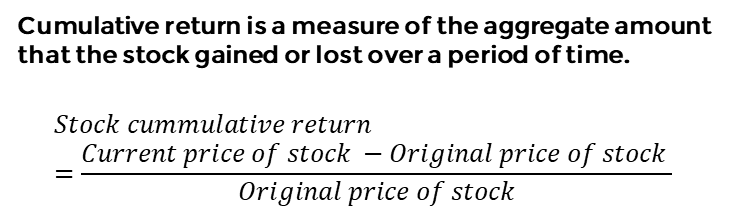

📌

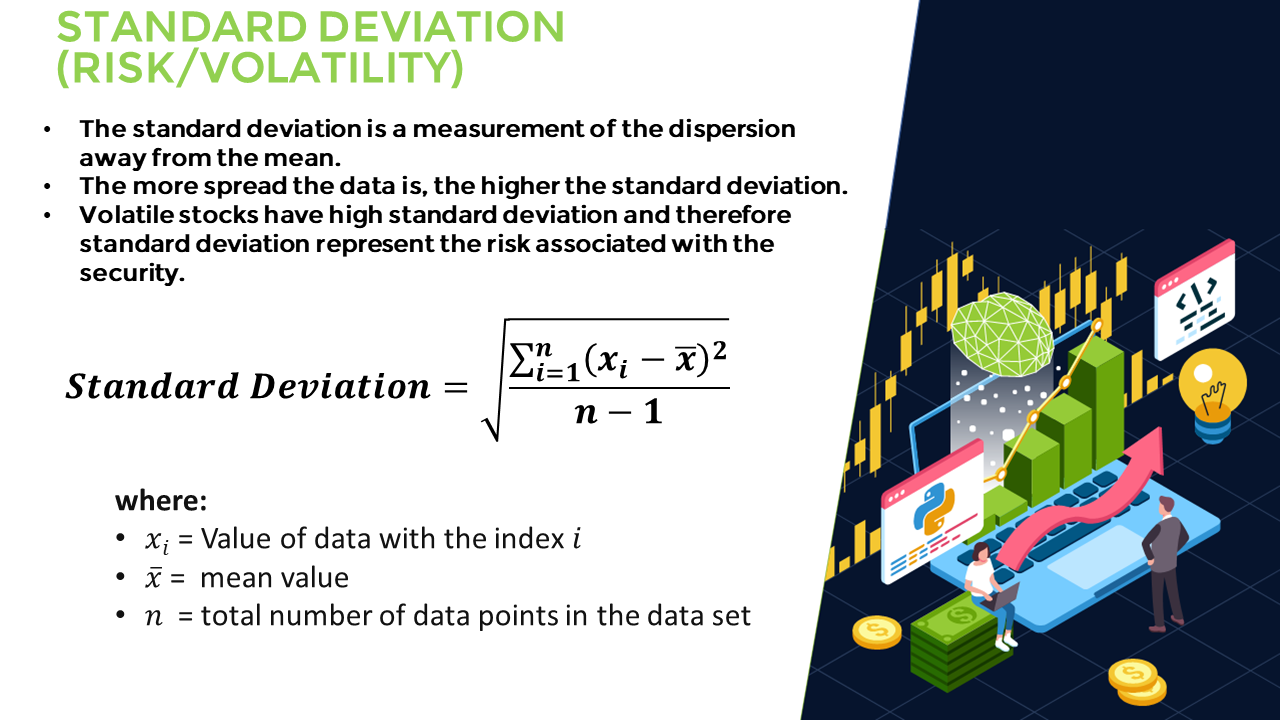

Measure of risk , measure of volaitlity for rational investors - standard deviation!

📌 **MOST IMPORTANT**

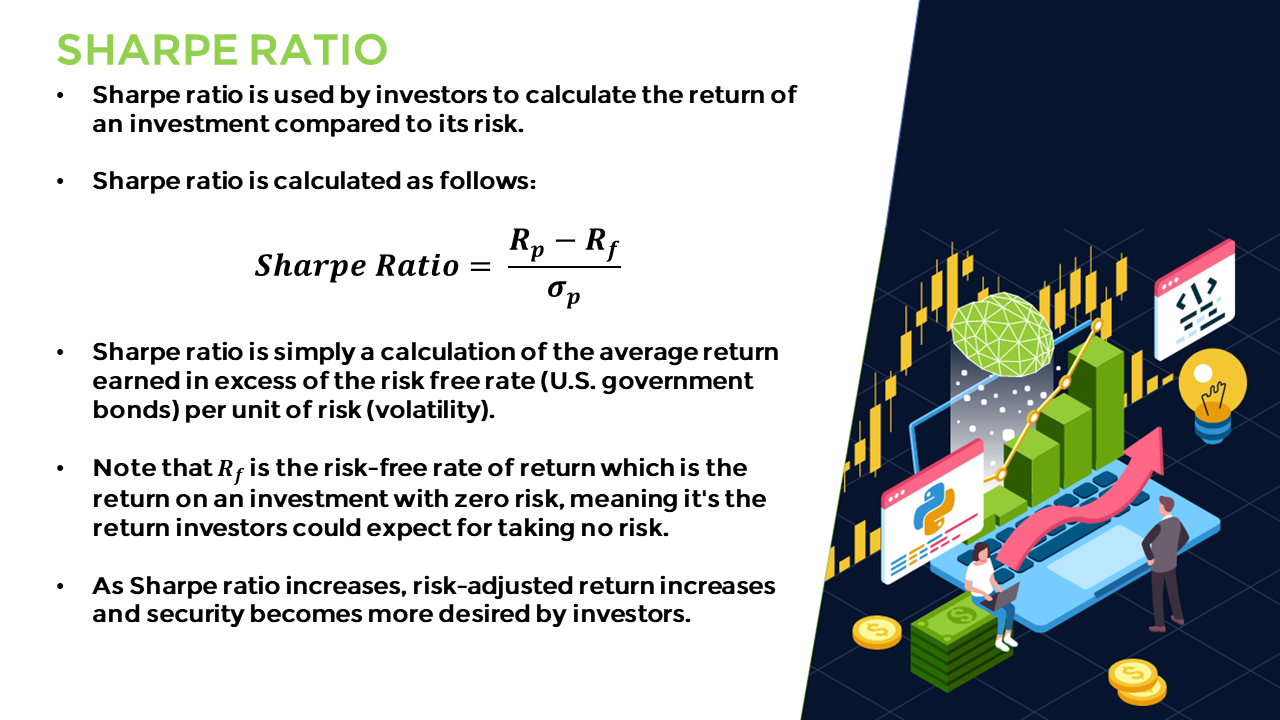

# 8. CALCULATING PORTFOLIO STATISTICAL METRICS

In [50]:
df_portfolio

Date          AAPL             BA             T            MGM  \
0     2012-01-12  1.865455e+05  132055.668533  38726.066735   66265.191333   
1     2012-01-13  1.858460e+05  130464.208019  38661.779153   67467.033221   
2     2012-01-17  1.880108e+05  131583.472032  38893.209823   66920.741454   
3     2012-01-18  1.899630e+05  131268.679029  38996.067898   69542.941935   
4     2012-01-19  1.893610e+05  132143.104039  39111.783233   69925.346172   
...          ...           ...            ...           ...            ...   
2154  2020-08-05  1.364262e+06  304789.579795  38378.919445   91339.977974   
2155  2020-08-06  1.411860e+06  301151.968255  38366.062185  100845.454720   
2156  2020-08-07  1.377277e+06  297339.487453  38597.492855  103959.328717   
2157  2020-08-10  1.397296e+06  313761.189144  38828.924811  118272.167549   
2158  2020-08-11  1.355741e+06  315020.362907  38828.924811  117452.729899   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     6.823688e+04  133400.069771  1.020568e+05  156024.746204  116689.152214   
1     6.920267e+04  132373.063620  8.233181e+04  154872.477953  116111.783296   
2     7.045935e+04  132993.697922  9.609592e+04  155762.081186  116524.323179   
3     7.347693e+04  133784.276743  9.685457e+04  156835.057698  117818.667088   
4     7.542012e+04  133377.904894  9.667394e+04  158485.405760  118400.533064   
...            ...            ...           ...            ...            ...   
2154  1.243115e+06   92689.216696  5.364826e+06  733058.327544  299741.151985   
2155  1.250861e+06   93184.253227  5.381299e+06  746235.972034  301667.796804   
2156  1.228543e+06   92327.179774  5.248101e+06  743445.242468  301858.761416   
2157  1.221057e+06   93915.717088  5.124766e+06  744246.142066  302686.524088   
2158  1.194880e+06   93649.728953  4.965161e+06  736396.247916  300274.375113   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.773308e+05                 -2.266916  
2                   9.972436e+05                  2.037460  
3                   1.008540e+06                  1.132789  
4                   1.012899e+06                  0.432198  
...                          ...                       ...  
2154                9.532200e+06                  0.477255  
2155                9.625472e+06                  0.978487  
2156                9.431450e+06                 -2.015717  
2157                9.354830e+06                 -0.812382  
2158                9.117404e+06                 -2.538008  

[2159 rows x 12 columns]

In [51]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 811.7403945534577 %


In [52]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.6227508100898647


In [53]:
# Calculate the average daily return
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.11563938669201401 %


In [54]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.1312385994772354


( 255 Trading days in a year )

Next, will be portfolio optimization and Capital Asset Pricing Model (CAPM).